<a href="https://colab.research.google.com/github/gaurav2612gupta/Algorithms/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/gaurav2612gupta/ML_Project/main/spam_ham_dataset.csv'
df = pd.read_csv(url)
# df

In [ ]:
df.drop(df.iloc[:, 0:1], inplace = True, axis = 1)
df.drop(df.iloc[:, 2:3], inplace = True, axis = 1)
# df

In [ ]:
df.rename(columns={'label':'target'},inplace=True)
df.sample(5)

,target,text
784,ham,"Subject: re : exxon company , usa global # 960..."
2294,spam,Subject: cable _ tv filter lets you get it all...
1085,ham,Subject: re : nom / actual vols for 24 th\n- -...
2622,ham,Subject: confirming requisitions\nconfirming t...
294,ham,Subject: natural gas nomination for 11 / 00\ne...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,Subject: enron methanol ; meter # : 988291\nth...
1,0,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,0,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\nthis deal is to ...


In [ ]:
# missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# check for douplicate Values
df.duplicated().sum()

178

In [ ]:
# remove Duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(4993, 2)

In [ ]:
df['target'].value_counts()

0    3531
1    1462
Name: target, dtype: int64

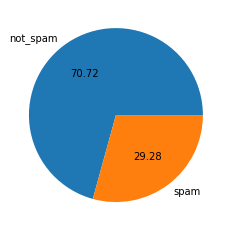

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['not_spam','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len)
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,Subject: enron methanol ; meter # : 988291\nth...,322,68,3
1,0,"Subject: hpl nom for january 9 , 2001\n( see a...",95,24,3
2,0,"Subject: neon retreat\nho ho ho , we ' re arou...",2515,551,24
3,1,"Subject: photoshop , windows , office . cheap ...",404,49,3
4,0,Subject: re : indian springs\nthis deal is to ...,332,71,3


In [ ]:
#for not_spam
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,977.089776,230.516001,11.662419
std,1380.153944,337.018933,25.330035
min,17.000000,3.000000,1.000000
25%,236.000000,53.000000,4.000000
50%,528.000000,128.000000,7.000000
75%,1230.000000,298.500000,13.500000
max,31860.000000,8863.000000,1204.000000


In [ ]:
#for spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1227.746238,241.315321,17.274282
std,1814.119546,349.439381,29.960218
min,10.000000,2.000000,1.000000
25%,299.000000,60.000000,4.000000
50%,577.500000,119.500000,9.000000
75%,1272.750000,252.750000,19.000000
max,21749.000000,3963.000000,577.000000


In [ ]:
import nltk
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# DATA PREPROCESSING

from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
 

In [ ]:
def transform_text(text):
    text = text.lower() #Lower Case
    text = nltk.word_tokenize(text) #Tokenize
    
    #Removing Special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    #Removing stop words and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #stemming
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

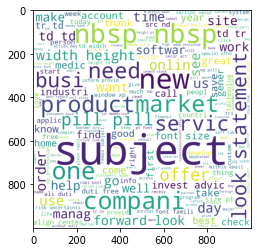

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

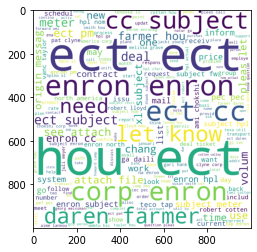

In [ ]:
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\nth...,322,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\n( see a...",95,24,3,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\nho ho ho , we ' re arou...",2515,551,24,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",404,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\nthis deal is to ...,332,71,3,subject indian spring deal book teco pvr reven...


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
len(spam_corpus)

196592

In [ ]:
pip install -U statsmodels

     |████████████████████████████████| 9.8 MB 13.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


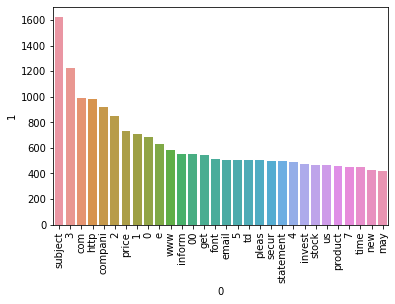

In [ ]:
from collections import Counter
import seaborn as sns

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


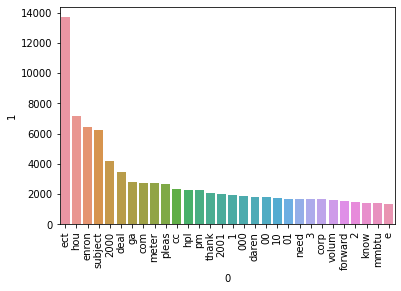

In [ ]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# MODEL BUILDING
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(4993, 42592)

In [ ]:
y=df['target'].values
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train

array([[0.07652189, 0.02453784, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05532344, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06830956, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
class Logistic_Regression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
    def score(self, X, y):
      return np.mean(self.predict(X) == y)
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y

In [ ]:
# lr = Logistic_Regression( learning_rate = 0.01, iterations = 10000 )
# lr.fit(X_train,y_train)
# print("Accuracy on training data: " + str(lr.score(X_train, y_train)*100) + "%")
# predicted = lr.predict(X_test)
# print("Testing Accuracy Score: " + str(accuracy_score(y_test, predicted)*100))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SigmoidNeuron:
    def __init__(self, epoch = 100, roh=1e-3):
        self.epoch = epoch
        self.roh = roh

    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self, X):
        return np.insert(X, 0, 1, axis=1)

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))

    def logloss(self, y, probs):
        return np.mean(-y*np.log(probs) - (1-y)*np.log(1-probs))

    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

    def mse(self, y, probs):
        return (((y - probs)**2).mean())/2
        
    def fit(self, X, y, lr=0.1, rand_seed=4, verbose=False):
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))*0.1
        self.fit_data(X, y, lr, verbose)
        return self
 
    def fit_data(self, X, y, lr, verbose):
        i = 0
        while (not self.epoch or i < self.epoch):
            self.loss.append(self.mse(y, self.predict_(X)))
            error = y - self.predict_(X)
            update = (lr * np.dot(error.T, X))
            self.weights += update
            if np.abs(update).max() < self.roh: break
            i +=1

In [ ]:
sgn = SigmoidNeuron(roh=0.01)
sgn.fit(X_train, y_train, lr=0.01)
print("Accuracy on training data: " + str(sgn.score(X_train, y_train)*100) + "%")
predicted = sgn.predict_classes(X_test)
print("Testing Accuracy Score: " + str(accuracy_score(y_test, predicted)*100))

Accuracy on training data: 99.02353530295443%
Testing Accuracy Score: 97.997997997998


In [ ]:
precision=precision_score(y_test,predicted)
print(precision)
recall=recall_score(y_test,predicted)
print(recall)


0.9577922077922078
0.9768211920529801


In [ ]:
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic',solver='sgd', random_state=1, max_iter=100).fit(X_train, y_train)
# mlp.predict(X_train)
# print("Accuracy on training data: " + str(mlp.score(X_train, y_train)*100) + "%")
# predicted = mlp.predict(X_test)
# print("Testing Accuracy Score: " + str(accuracy_score(y_test, predicted)*100))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import  MultinomialNB
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(C=1, penalty='l1', solver='liblinear')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'AdaBoost':abc,
    'ETC':etc,
    'GBDT':gbdt,
    'RF':rfc
}

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.908908908908909, 0.9953051643192489)

In [ ]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  print("For",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy -  0.984984984984985
Precision -  0.9555555555555556
For KN
Accuracy -  0.9579579579579579
Precision -  0.9676258992805755
For NB
Accuracy -  0.908908908908909
Precision -  0.9953051643192489
For DT
Accuracy -  0.8518518518518519
Precision -  0.8235294117647058
For LR
Accuracy -  0.9579579579579579
Precision -  0.891566265060241
For AdaBoost
Accuracy -  0.9479479479479479
Precision -  0.8955696202531646
For ETC
Accuracy -  0.97997997997998
Precision -  0.9519230769230769
For GBDT
Accuracy -  0.9279279279279279
Precision -  0.9197080291970803
For RF
Accuracy -  0.975975975975976
Precision -  0.9512987012987013


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.908909,0.995305
1,KN,0.957958,0.967626
0,SVC,0.984985,0.955556
6,ETC,0.979980,0.951923
8,RF,0.975976,0.951299
7,GBDT,0.927928,0.919708
5,AdaBoost,0.947948,0.895570
4,LR,0.957958,0.891566
3,DT,0.851852,0.823529


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))